In [10]:
import pandas as pd
import numpy as np

#Импорт данных.

In [11]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Информация о датасете.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


#Процент выживаемости.

In [46]:
survived = df.groupby('Pclass')['Survived'].mean() * 100

In [50]:
survived[3]

24.236252545824847

In [53]:
print(f'Процент выживших из первого класса: {survived[1]:.2f}'
        f'\nПроцент выживших из первого класса: {survived[2]:.2f}'
        f'\nПроцент выживших из первого класса: {survived[3]:.2f}')

Процент выживших из первого класса: 62.96
Процент выживших из первого класса: 47.28
Процент выживших из первого класса: 24.24


<Axes: title={'center': 'Процент выживаемости пассажиров'}, xlabel='Класс', ylabel='Выживших, %'>

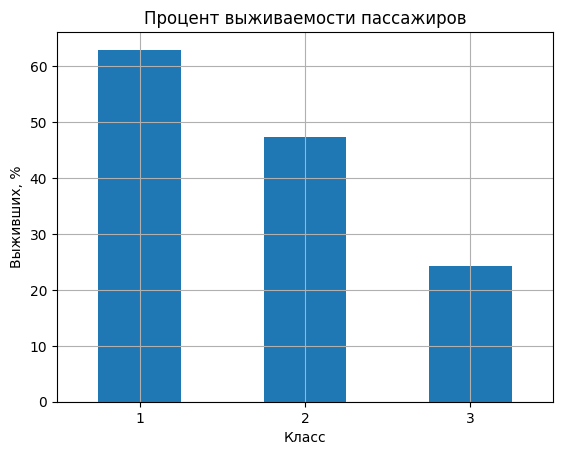

In [54]:
pd.Series(survived).plot(kind='bar',
                              rot=0,
                              title='Процент выживаемости пассажиров',
                              xlabel='Класс',
                              ylabel='Выживших, %',
                              grid=True)

#Популярные имена.

In [75]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
139,140,0,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.2000,B86,C
582,583,0,2,"Downton, Mr. William James",male,54.0,0,0,28403,26.0000,NaN,S
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S
833,834,0,3,"Augustsson, Mr. Albert",male,23.0,0,0,347468,7.8542,NaN,S
206,207,0,3,"Backstrom, Mr. Karl Alfred",male,32.0,1,0,3101278,15.8500,NaN,S
330,331,1,3,"McCoy, Miss. Agnes",female,NaN,2,0,367226,23.2500,NaN,Q
171,172,0,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.1250,NaN,Q
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C


In [98]:
men_names_with_preffix = df.loc[df['Sex'] == 'male']['Name'].str.split(',').str.get(1)
women_names_with_preffix = df.loc[df['Sex'] == 'female']['Name'].str.split(',').str.get(1)

In [164]:
def find_name_for_mrs(name_list):
    name = name_list[1].lstrip('(').rstrip(')')
    for i in name_list:
        if '(' in i:
            name = i.lstrip('(').rstrip(')')
    return name


def find_names(names_with_preffix, female = False):
    names = []
    for name_with_preffix in names_with_preffix:
        if female:
            if name_with_preffix.split()[0] == 'Mrs.':
                names.append(find_name_for_mrs(name_with_preffix.split()))
            else:
                names.append(name_with_preffix.split()[1].lstrip('(').rstrip(')'))
        else:
            names.append(name_with_preffix.split()[1].lstrip('(').rstrip(')'))
    return names

In [170]:
male_names = pd.Series(find_names(men_names_with_preffix))
female_names = pd.Series(find_names(women_names_with_preffix, female=True))


In [173]:
male_names.value_counts()

,count
William,35
John,25
George,14
Charles,13
Thomas,13
...,...
Ignjac,1
Yoto,1
Austen,1
Mitto,1


In [176]:
female_names.value_counts()

,count
Anna,15
Mary,14
Elizabeth,11
Margaret,10
Alice,7
...,...
Gertrude,1
Hanne,1
Helena,1
Elna,1


In [178]:
print("Самое популярное мужское имя на Титанике - William")
print("Самое популярное женское имя на Титанике - Anna")

Самое популярное мужское имя на Титанике - William
Самое популярное женское имя на Титанике - Anna


#Популярные имена по классам.

In [180]:
first_men_names_with_preffix = df.loc[(df['Sex'] == 'male') & (df['Pclass'] == 1)]['Name'].str.split(',').str.get(1)
second_men_names_with_preffix = df.loc[(df['Sex'] == 'male') & (df['Pclass'] == 2)]['Name'].str.split(',').str.get(1)
third_men_names_with_preffix = df.loc[(df['Sex'] == 'male') & (df['Pclass'] == 3)]['Name'].str.split(',').str.get(1)
first_women_names_with_preffix = df.loc[(df['Sex'] == 'female') & (df['Pclass'] == 1)]['Name'].str.split(',').str.get(1)
second_women_names_with_preffix = df.loc[(df['Sex'] == 'female') & (df['Pclass'] == 2)]['Name'].str.split(',').str.get(1)
third_women_names_with_preffix = df.loc[(df['Sex'] == 'female') & (df['Pclass'] == 3)]['Name'].str.split(',').str.get(1)

In [181]:
first_male_names = pd.Series(find_names(first_men_names_with_preffix))
second_male_names = pd.Series(find_names(second_men_names_with_preffix))
third_male_names = pd.Series(find_names(third_men_names_with_preffix))
first_female_names = pd.Series(find_names(first_women_names_with_preffix, female=True))
second_female_names = pd.Series(find_names(second_women_names_with_preffix, female=True))
third_female_names = pd.Series(find_names(third_women_names_with_preffix, female=True))

In [183]:
first_male_names.value_counts()

,count
William,11
John,9
George,6
Charles,5
Arthur,5
...,...
Sante,1
Mark,1
Frederic,1
Samuel,1


In [184]:
second_male_names.value_counts()

,count
William,9
Charles,6
John,5
George,4
Robert,4
Richard,4
Frederick,3
Reginald,3
Alfred,3
Henry,3


In [185]:
third_male_names.value_counts()

,count
William,15
John,11
James,8
Johan,8
Thomas,7
...,...
Ignjac,1
Yoto,1
Mitto,1
Jovan,1


In [186]:
print("Самое популярное мужское имя для всех классов - William.")

Самое популярное мужское имя для всех классов - William.


In [188]:
first_female_names.value_counts()

,count
Elizabeth,5
Margaret,5
Mary,4
Alice,4
Anna,3
...,...
Leontine,1
Leila,1
Marjorie,1
Daisy,1


In [191]:
second_female_names.value_counts()

,count
Elizabeth,5
Ada,4
Mary,3
Anna,3
Jane,2
Amelia,2
Marion,2
Annie,2
Kate,2
Jessie,2


In [190]:
third_female_names.value_counts()

,count
Anna,9
Mary,7
Margaret,5
Maria,4
Catherine,4
...,...
Eliina,1
Telma,1
Carla,1
Luise,1


In [192]:
print("Самое популярное женское имя для 1 и 2 класса - Elizabeth")
print("Самое популярное женское имя для 3 класса - Anna")

Самое популярное женское имя для 1 и 2 класса - Elizabeth
Самое популярное женское имя для 3 класса - Anna


#Пассажиры старше 44 лет.

In [33]:
df[df['Age'] > 44]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S


#Мужчины младше 44 лет.

In [34]:
df.loc[(df['Age'] < 44) & (df['Sex'] == 'male')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.050,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.500,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C


#Количество n-местных кабин.

In [62]:
cabins = df.groupby('Cabin').size().value_counts()

In [65]:
print(f"На Титанике было {cabins[1]} 1-местных кают.\n"
      f"На Титанике было {cabins[2]} 2-местных кают.\n"
      f"На Титанике было {cabins[3]} 3-местных кают.\n"
      f"На Титанике было {cabins[4]} 4-местных кают.")

На Титанике было 101 1-местных кают.
На Титанике было 38 2-местных кают.
На Титанике было 5 3-местных кают.
На Титанике было 3 4-местных кают.
